## German Credit Risk Classification Task

### Problem Description
The dataset comes from UC Irvine Machine Learning Repository. According to the source, "this dataset classifies people described by a set of attributes as good or bad credit risks." The dataset contains 2000 observations with 32 features - some information has been tweaked by the course coordinator. The features are a mix of numeric and categorical values. The target variable is a binary variable indicating whether the person is a good or bad credit risk, according to the attributes.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('data/c2.csv')
df

,id,age,checking_status,class,credit_amount,credit_history,duration,employment,existing_credits,feat01,...,job,num_dependents,other_parties,other_payment_plans,own_telephone,personal_status,property_magnitude,purpose,residence_since,savings_status
0,1,50,'no checking',good,2319,'existing paid',21,'>=7',2,0.239898,...,skilled,1,none,none,none,'male single','real estate',furniture/equipment,2,'<100'
1,2,30,'no checking',good,1163,'delayed previously',15,'4<=X<7',2,0.521139,...,skilled,1,none,none,none,'female div/dep/mar','life insurance',furniture/equipment,2,'>=1000'
2,3,32,'no checking',good,1502,'critical/other existing credit',10,'>=7',2,0.286838,...,'unskilled resident',2,none,none,none,'male single','real estate','new car',4,'<100'
3,4,34,'no checking',good,4436,'delayed previously',36,'1<=X<4',2,0.430937,...,skilled,1,none,none,none,'female div/dep/mar','real estate',radio/tv,4,'<100'
4,5,21,'no checking',good,10155,'existing paid',60,'4<=X<7',1,0.439643,...,skilled,1,none,none,yes,'female div/dep/mar','real estate',radio/tv,4,'100<=X<500'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,30,'0<=X<200',good,1743,'existing paid',6,'<1',1,0.353228,...,'high qualif/self emp/mgmt',1,none,none,yes,'male mar/wid',car,radio/tv,3,'<100'
1996,1997,24,'<0',bad,2994,'existing paid',18,'1<=X<4',1,0.644627,...,skilled,1,none,none,none,'female div/dep/mar','real estate',radio/tv,2,'<100'
1997,1998,26,'no checking',good,1255,'existing paid',12,'1<=X<4',1,0.597782,...,skilled,1,none,none,yes,'male mar/wid','real estate',business,2,'<100'
1998,1999,39,'no checking',good,1637,'existing paid',12,'>=7',1,0.462609,...,'high qualif/self emp/mgmt',1,none,none,yes,'male single',car,'new car',4,'<100'


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2000 non-null   int64  
 1   age                     2000 non-null   int64  
 2   checking_status         2000 non-null   object 
 3   class                   2000 non-null   object 
 4   credit_amount           2000 non-null   int64  
 5   credit_history          2000 non-null   object 
 6   duration                2000 non-null   int64  
 7   employment              2000 non-null   object 
 8   existing_credits        2000 non-null   int64  
 9   feat01                  2000 non-null   float64
 10  feat02                  2000 non-null   float64
 11  feat03                  2000 non-null   float64
 12  feat04                  2000 non-null   float64
 13  feat05                  2000 non-null   float64
 14  feat06                  2000 non-null   

### Data Description
The dataset contains 2000 observations with 31 features - "id" column was left out. Feature information:
- 17 variables are natively of type numeric (age, credit_amount, duration, existing_credits, feats 1 through 10, installment_commitement. num_dependents, residence_since)
- 14 variables are natively of type string (checking_status, class, credit_history, employment, foreign_worker, housing, job, other_parties, other_payment_plans, own_telephone, personal_status, property_magnitude, purpose, savings_status)

In [8]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("classification_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Variable Insights
- age: 19-75, mean 35.5, median 33, std 11.2 - most of the people are in their 30s, with possibly a lot of time to still pay the credit back
- checking_status: 4 categories, most people have no checking account, followed by poeple having less than 0 ("<0" category) DM in their account, followed by 0<=...<200 DM, followed by >=200 DM - this variable can be remapped to a numeric variable - we propose the following mapping: "no checking account" = -1, "<0 DM" = 0, "0<=...<200 DM" = 200, ">=200 DM" = 400
- class: the target variable - 2 categories, 69,1% of the people are classified as "good" credit risk, 30% as "bad" credit risk - the dataset is imbalanced - we will need to take this into account when evaluating the model. We will remap the target variable to 0 and 1, where 0 = "good" credit risk and 1 = "bad" credit risk.
- credit_amount: 250-18422, mean 3238 - the credit amounts vary a lot, with most of the people having a credit amount of less than 5000 DM. The variable's distribution is right-skewed, with a possibility to use log transformation for this variable.
- credit_history: 5 categories, most people have existing paid credits, followed by people having critical/other existing credits, followed by people having credits delayed previously, followed by people having "all paid" credits, finally with people having "no credits/all paid" status. We believe that this category can be crucial in further evaluating the credit risk, as people who have had problems with paying their credits in the past are more likely to have problems in the future.
- duration: 4-72, mean 20.7 - the duration of the credit varies a lot, with most of the people having a credit duration of less than 30 months. The variable's distribution is right-skewed. We believe that this variable can be crucial in further evaluating the credit risk, as people who have a longer credit duration are more likely to have problems with paying the credit back.
- employment: 5 categories, most people are employed for between 1 and 4 years, followed by people employed for longer than 7 years, followed by people being employed between 4 and 7 years, followed by people employed for less than a year, finally we have category of people that are unemployed. We propose a remapping of the variable, where "unemployed" = -1, "<1 year" = 1, "1<=...<4 years" = 4, "4<=...<7 years" = 7, ">=7 years" = 10.
- existing_credits: 1-4, mean 1.4 - most of the people have 1 existing credit, followed by people having 2 existing credits, followed by people having 3 existing credits, finally followed by people having 4 existing credits. Most of the people have 1 credit (1253) or 2 credits (672 people).
- feat01: numeric in within range of 0 and 1, with mean = 0.46, std = 0.152. Looks like normal distribution.
- feat02: numeric in within range of 0 and 1, with mean = 0.57, std = 0.116. Less variance than feat01, but still looks somewhat like normal distribution.
- feat03: numeric in within range of 0.09 and 1.84, with mean = 1.03, std = 0.32. Higher variance than feat01.
- feat04: numeric in within range of 0.12 and 1.87, with mean = 0.98, std = 0.32. Very similiar distrubution to feat03.
- feat05: numeric in within range of 0.08 and 1.87, with mean = 0.98, std = 0.33. Very similiar distrubution to feat03 and feat04.
- feat06: numeric in within range of 0.16 and 1.84, with mean = 1.01, std = 0.32. Very similiar distrubution to feat03, feat04 and feat05.
- feat07: numeric in within range of 0.11 and 1.80, with mean = 0.98, std = 0.32. Very similiar distrubution to feat03, feat04, feat05 and feat06.
- feat08: numeric in within range of 0.10 and 1.87, with mean = 1.01, std = 0.32. Very similiar distrubution to feat03, feat04, feat05, feat06 and feat07.
- feat09: numeric in within range of 0.14 and 1.95, with mean = 0.98, std = 0.32. Very similiar distrubution to feat03, feat04, feat05, feat06, feat07 and feat08.
- feat10: numeric in within range of 0 and 1, with mean = 0.5, std = 0.14. Very similiar distrubution to feat01.
- foreign_worker: 2 categories, most people are foreign workers, followed by people being native workers.
- housing: 3 categories, most people have their own housing (1444), followed by people living in rented housing, followed by people living for free.
- installment_commitment: categories 1-4 - most of the people have installment commitment of 4, followed by people having installment commitment of 2 - this is installment rate in % of disposable income. Almost half of the people had installment commitment of 4 (978), followed by people having installment commitment of 2 (455).
- job: 4 categories, most people have skilled job (1258), followed by people being unskilled residents, followed by people being highly qualified/self-employed, with few people beying unemployed/unskilled non-resident.
- num_dependents: 1-2 - most of the people have 1 dependent (1694), followed by people having 2 dependents.
- other_parties: 3 categories, most people have none (1818), followed by people having guarantor (104) and co applicant. This will probably be a very important variable in further evaluating the credit risk.
- other_payment_plans: 3 categories, most people have none (1634), followed by people having bank and stores payment plans.
- own_telephone: 2 categories, most people dont have their own telephone (1174), followed by people having their own telephone.
- personal_status: 4 categories, most of the people (1065) are male singles, 649 of them are females divorced/dep or married, about 25% of them are married/widowed males and 105 of the people are males after divorce or separation
- property_magnitude: 4 categories, most people have a car (668), followed by people having real estate, followed by people having life insurance, followed by people having no property.
- purpose: 10 categories, most people take credit for radio/tv (563), followed by people taking credit for new car, furniture/equipment, business, used car, education, repairs, domestic appliances, other and retraining. This feature should be highly correlated with the amount that a person want to take credit for.
- residence_since: 1-4 - most of the people have been living at their current residence for 4 years, followed by people living there for 2 years, followed by people living there for 3 years, followed by people living there for 1 year.
- savings_status: 5 categories, most people have less than 100 DM in their savings account, followed by people having no known savings, followed by people having between 100 and 500 DM, followed by people having between 500 and 1000 DM, followed by people having more than 1000 DM. This variable can be remapped to a numeric variable - we propose the following mapping: "no known savings" = -1, "<100 DM" = 100, "100<=...<500 DM" = 500, "500<=...<1000 DM" = 1000, ">=1000 DM" = 2000. This can impact the credit risk, as people with more savings are more likely to pay the credit back.

Correlations:
- credit amount and duration are highly correlated - this is expected, as the longer the credit duration, the higher the credit amount
- feats 1 through 10 are uncorrelated with each other
- housing and property magnitude are highly correlated - this is expected, as people with owning housing means higher property magnitude

Missing values:
- no missing values in the dataset


### Variable transformations
- checking_status: remap to a numeric variable - we propose the following mapping: "no checking account" = -1, "<0 DM" = 0, "0<=...<200 DM" = 200, ">=200 DM" = 400
- class: remap to 0 and 1, where 0 = "good" credit risk and 1 = "bad" credit risk
- employment: remap to a numeric variable, where "unemployed" = -1, "<1 year" = 1, "1<=...<4 years" = 4, "4<=...<7 years" = 7, ">=7 years" = 10
- credit_amount: log transformation
- savings_status: remap to a numeric variable - "no known savings" = -1, "<100 DM" = 100, "100<=...<500 DM" = 500, "500<=...<1000 DM" = 1000, ">=1000 DM" = 2000

Importantly - each of these transformations can be done on the whole dataset since there is no risk of data leakage with such transformations. Further transformations will be done (fitted) on the training set and then applied to the test set.

In [2]:
import numpy as np
df['checking_status'] = df['checking_status'].map({"'<0'": 0, "'0<=X<200'": 200, "'>=200'": 400, "'no checking'": -1})

df['employment'] = df['employment'].map({"unemployed": -1, "'<1'": 1, "'1<=X<4'": 4, "'4<=X<7'": 7, "'>=7'": 10})

df['savings_status'] = df['savings_status'].map({"'<100'": 100, "'100<=X<500'": 500, "'500<=X<1000'": 1000, "'>=1000'": 2000, "'no known savings'": -1})

df['class'] = df['class'].map({'good': 0, 'bad': 1})

df['credit_amount'] = df['credit_amount'].apply(lambda x: np.log(x))

In [3]:
from sklearn.model_selection import train_test_split
x, x_out_of_sample, y, y_out_of_sample = train_test_split(df.drop(columns=['class', 'id']), df['class'], test_size=0.2, random_state=42, stratify=df['class'])

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Variable selection
For this purpose, we will analyse the variables using the following methods:
- Mutual information
- Random Forest (feature importance)

In [33]:
from sklearn.feature_selection import mutual_info_classif
X_train_numeric = pd.get_dummies(x, drop_first=True)
mi = mutual_info_classif(X_train_numeric, y)
mi = pd.Series(mi)
mi.index = X_train_numeric.columns
mi.groupby(lambda x: x.split('_')[0]).mean().sort_values(ascending=False)

checking       0.067681
feat02         0.048123
feat10         0.038384
feat03         0.031934
employment     0.026423
num            0.023385
duration       0.021285
savings        0.020281
age            0.017086
foreign        0.015072
feat01         0.014585
installment    0.009563
credit         0.008014
purpose        0.006736
personal       0.005348
feat09         0.005086
own            0.004734
feat07         0.003551
housing        0.003483
existing       0.001743
feat05         0.000000
job            0.000000
feat08         0.000000
other          0.000000
property       0.000000
feat06         0.000000
residence      0.000000
feat04         0.000000
dtype: float64

<AxesSubplot:>

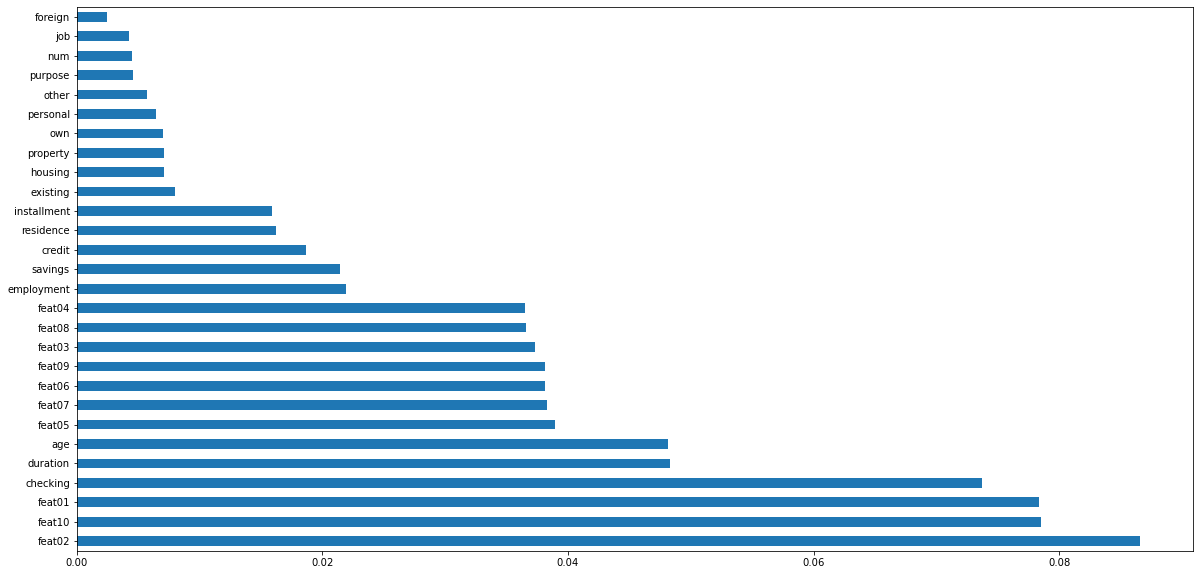

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_numeric, y)
plt.rcParams['figure.figsize'] = [20, 10]
pd.Series(rf.feature_importances_, index=X_train_numeric.columns).groupby(lambda x: x.split('_')[0]).mean().sort_values(ascending=False).plot(kind='barh')

Installment commitement seems like nice cutoff point. in case feat importance < installment and mutual info < 0.01, we will drop the feature
`feats_to_drop = ['purpose', 'personal_status', 'own_telephone', 'housing', 'existing_credits', 'job', 'other_parties', 'property_magnitude']`
We can somewhat justify dropping these features:
- purpose: we know the credit amount, so we can somewhat infer the purpose of the credit
- personal_status: this information might not be that important, as we have information about the number of dependents
- own_telephone: this information doesnt seem to be related with the credit risk
- housing: most of the people have their own housing, so this information doesnt seem to be related with the credit risk. although it might play a role when defaulting - people with houses have property to lose - so the feature will stay
- existing_credits: this information is correlated with installment commitement. though, it might give us some information when in an interaction with another variable
- job: i cant reasonably justify dropping this feature - it will stay
- other_parties: it seems like only a fraction of people have other parties involved in the credit, and this doesnt seem to be related with the credit risk
- property_magnitude: i cant reasonably justify dropping this feature - it will stay


In [4]:
feats_to_drop = ['purpose', 'personal_status', 'own_telephone', 'other_parties']
x = x.drop(columns=feats_to_drop)
x_out_of_sample = x_out_of_sample.drop(columns=feats_to_drop)

Now we will define a pipeline for model training and evaluation. 
For numerical variables, we will use RobustScaler.
For categorical variables, we will use OneHotEncoder for encoding purposes, for the models to handle our categorical variables.
Then, we will have RandomizedSearchCV for hyperparameter tuning, with StratifiedKFold cross validation.
In our models, we will focus on imbalanced problem, so we choose average precision score as our scoring metric, due to the fact that it is not sensitive to class imbalance.

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler

def get_pipeline_for_model(
    model, model_params: dict = None
):
    numerical_prep = make_pipeline(RobustScaler())
    categorical_prep = make_pipeline(
        OneHotEncoder(handle_unknown="ignore", sparse=False, drop="first"),
    )
    preprocess = ColumnTransformer(
        [
            (
                "numerical",
                numerical_prep,
                make_column_selector(dtype_include=["int64", "float64"]),
            ),
            (
                "categorical",
                categorical_prep,
                make_column_selector(dtype_include=object),
            ),
        ],
        remainder="passthrough",
    )
    preprocess.set_output(transform="pandas")
    return Pipeline(
        [
            ("preprocess", preprocess),
            ("model", model(**model_params if model_params else {})),
        ]
    )

In [8]:
from sklearn.base import BaseEstimator
from dataclasses import dataclass, field
from sklearn.model_selection import RandomizedSearchCV
from loguru import logger


@dataclass
class OneModelHyperoptResult:
    best_model: BaseEstimator
    best_score: float
    cv_results: pd.DataFrame

    def get_model_name(self) -> str:
        return self.best_model["model"].__class__.__name__

@dataclass
class HyperoptInput:
    model: BaseEstimator
    hyperopt_space: dict = field(default_factory=dict)

@dataclass
class HyperoptResults:
    results: list

    def __post_init__(self):
        self._sort_by_best_score()

    def _sort_by_best_score(self, reversed: bool = True):
        self.results.sort(key=lambda x: x.best_score, reverse=reversed)

    def get_best_model(self):
        return self.results[0].best_model

    def get_best_score(self):
        return self.results[0].best_score

    def get_merged_df(self):
        results = pd.DataFrame()
        for result in self.results:
            results = pd.concat(
                [
                    results,
                    result.cv_results.assign(
                        model_name=result.get_model_name()
                    ),
                ],
                axis=0,
            )

        return results

    def get_all_dfs(self):
        return [
            (result.get_model_name(), result.cv_results)
            for result in self.results
        ]

    def get_all_scores(self):
        return [
            (result.get_model_name(), result.best_score)
            for result in self.results
        ]

    def get_all_models(self):
        return [
            (result.get_model_name(), result.best_model)
            for result in self.results
        ]

def run_hyperopt_one_model(
    x: pd.DataFrame,
    y: pd.Series,
    model_input: HyperoptInput,
    n_iter: int = 10,
    cv: int = 5,
    random_state: int = 42,
):
    pipeline = get_pipeline_for_model(model_input.model)
    search = RandomizedSearchCV(
        pipeline,
        model_input.hyperopt_space,
        n_iter=n_iter,
        scoring="average_precision",
        n_jobs=-1,
        cv=cv,
        random_state=random_state,
    )
    search.fit(x, y)
    return OneModelHyperoptResult(
        best_model=search.best_estimator_,
        best_score=search.best_score_,
        cv_results=pd.DataFrame(search.cv_results_),
    )
def run_hyperopt(
    hyperopt_inputs: list,
    n_iter: int = 10,
    cv: int = 5,
    random_state: int = 42,
) -> HyperoptResults:
    results = []
    for model_input in hyperopt_inputs:
        logger.info(f"Running hyperopt for {model_input.model.__name__}")
        result = run_hyperopt_one_model(
            x=x,
            y=y,
            model_input=model_input,
            n_iter=n_iter,
            cv=cv,
            random_state=random_state,
        )
        results.append(result)
        logger.info(f"Best score: {result.best_score}")
    return HyperoptResults(results=results)

In [9]:
pos_weight = y.value_counts()[0] / y.value_counts()[1]
pos_weight

2.2388663967611335

In [ ]:
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold

base_hyperopt_inputs = [
    HyperoptInput(
        model=RandomForestClassifier,
        hyperopt_space={
            "model__n_jobs": [-1],
            "model__n_estimators": randint(50, 500),
            "model__criterion": ["gini", "entropy", "log_loss"],
            "model__max_depth": randint(3, 9),
            "model__min_samples_split": uniform(0.01, 0.04),
            "model__class_weight": ["balanced"],
            "model__max_samples": uniform(0.7, 0.2),
        },
    ),
    HyperoptInput(
        model=XGBClassifier,
        hyperopt_space={
            "model__n_jobs": [-1],
            "model__n_estimators": randint(50, 500),
            "model__max_depth": randint(4, 10),
            "model__learning_rate": uniform(0.01, 0.29),
            "model__subsample": uniform(0.8, 0.2),
            "model__colsample_bytree": uniform(0.6, 0.3),
            "model__scale_pos_weight": [pos_weight],
            "model__gamma": uniform(0, 5),
            "model__lambda": uniform(0, 5),
            "model__alpha": uniform(0, 5),
            "model__grow_policy": ["lossguide", "depthwise"],
        },
    ),
    HyperoptInput(
        model=ExtraTreesClassifier,
        hyperopt_space={
            "model__n_jobs": [-1],
            "model__criterion": ["gini", "entropy", "log_loss"],
            "model__n_estimators": randint(50, 500),
            "model__max_depth": randint(3, 9),
            "model__min_samples_split": uniform(0.01, 0.04),
            "model__class_weight": ["balanced"],
        },
    ),
    HyperoptInput(
        model=LGBMClassifier,
    hyperopt_space={
        "model__n_jobs": [-1],
        "model__boosting_type": ["gbdt", "dart"],
        "model__n_estimators": randint(50, 500),
        "model__class_weight": ['balanced'],
        "model__learning_rate": uniform(0.01, 0.29),
        "model__subsample": uniform(0.8, 0.2),
        "model__colsample_bytree": uniform(0.6, 0.3),
        "model__reg_alpha": uniform(0, 5),
        "model__reg_lambda": uniform(0, 5),
    })
]
s_cv = StratifiedKFold(n_splits=5)
results = run_hyperopt(base_hyperopt_inputs, n_iter=50, cv=s_cv)

### Model evaluation

In [96]:
results.get_merged_df()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__class_weight,param_model__criterion,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,param_model__n_jobs,...,param_model__gamma,param_model__grow_policy,param_model__lambda,param_model__learning_rate,param_model__scale_pos_weight,param_model__subsample,param_model__boosting_type,param_model__reg_alpha,param_model__reg_lambda,param_model__max_samples
0,0.551782,0.043489,0.129434,0.026726,balanced,log_loss,6,0.048029,156,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.270045,0.092235,0.143669,0.011074,balanced,gini,7,0.016241,264,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.559594,0.052444,0.110063,0.006633,balanced,log_loss,5,0.044647,149,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.642170,0.029214,0.200820,0.018869,balanced,log_loss,8,0.012256,393,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.286185,0.215443,0.233868,0.016632,balanced,entropy,8,0.010031,493,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,3.168266,0.184362,0.229850,0.018919,balanced,log_loss,4,0.037028,490,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.867542
46,1.149349,0.198277,0.083908,0.006401,balanced,gini,4,0.045094,148,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.884939
47,0.879902,0.180565,0.075062,0.005055,balanced,log_loss,6,0.049287,109,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.734991
48,0.608769,0.043772,0.069878,0.012535,balanced,gini,4,0.048617,86,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.899251


In [97]:
results.get_all_scores()

[('ExtraTreesClassifier', 0.7976447599660041),
 ('XGBClassifier', 0.7974518875540617),
 ('LGBMClassifier', 0.7816934914571763),
 ('RandomForestClassifier', 0.7571002087648209)]

In [98]:
best_model = results.get_best_model()
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd1a43c0be0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd1a43c0310>)])),
                ('model',
                 ExtraTreesClassifier(class_weight='balanced',
                                      criterion='log_loss', max_depth=8,
                                      min_samples_split=0.010020815079812633,
                                      n_estimators=282, n_jobs=-1))])

### Model evaluation on out of sample data

In [116]:
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, accuracy_score, precision_score
@dataclass
class ClassificationScores:
    au_roc: float
    au_prc: float
    f1: float
    accuracy: float
    precision: float

def get_classification_scores(
    model: BaseEstimator, x: pd.DataFrame, y: pd.Series
) -> ClassificationScores:
    y_pred = model.predict(x)
    y_pred_proba = model.predict_proba(x)[:, 1]
    return ClassificationScores(
        au_roc=roc_auc_score(y, y_pred_proba),
        au_prc=average_precision_score(y, y_pred_proba),
        f1=f1_score(y, y_pred),
        accuracy=accuracy_score(y, y_pred),
        precision=precision_score(y, y_pred),
    )

In [132]:
models_stats = {}
for i in range(4):
    models_stats[results.results[i].get_model_name()] = get_classification_scores(results.results[i].best_model, x_out_of_sample, y_out_of_sample)
models_stats = {k: [v.au_roc, v.au_prc, v.f1, v.accuracy, v.precision] for k, v in models_stats.items()}
index = ['au_roc', 'au_prc', 'f1', 'accuracy', 'precision']
models_stats = pd.DataFrame(models_stats, index=index)
pd.DataFrame(models_stats)

,ExtraTreesClassifier,XGBClassifier,LGBMClassifier,RandomForestClassifier
au_roc,0.865971,0.892327,0.892093,0.862962
au_prc,0.783787,0.798993,0.803246,0.740527
f1,0.708955,0.713725,0.715447,0.669291
accuracy,0.805000,0.817500,0.825000,0.790000
precision,0.659722,0.694656,0.721311,0.653846


Interestingly, on training set, ExtraTreesClassifier had the best score, beating boosting methods - XGB and LightGBM by a small margin. Though, when it comes to out of sample data, the boosting methods are better than ExtraTreesClassifier. This suggests that the Boosting methods generalized better than ExtraTreesClassifier. Let us have an insight into XGB and LGBM hyperparameters.

In [138]:
for i in range(1, 3):
    print(results.results[i].get_model_name())
    param_dct = {}
    for param, value in results.results[i].best_model['model'].get_params().items():
        if value is not None and param not in ['objective', 'enable_categorical', 'missing', 'n_jobs', 'scale_pos_weight', 'class_weight']:
            param_dct[param] = value
            
    print(f'{param_dct} \n\n')

XGBClassifier
{'colsample_bytree': 0.6956926890881283, 'gamma': 4.2243765548472725, 'grow_policy': 'depthwise', 'learning_rate': 0.0856014131884119, 'max_depth': 7, 'n_estimators': 363, 'subsample': 0.9393474330728302, 'alpha': 0.35594324230114494, 'lambda': 1.7031228473212001} 


LGBMClassifier
{'boosting_type': 'dart', 'colsample_bytree': 0.7345272428958742, 'importance_type': 'split', 'learning_rate': 0.298392664157138, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 210, 'num_leaves': 31, 'reg_alpha': 0.09037681807760434, 'reg_lambda': 2.469468575917173, 'subsample': 0.8357645418442659, 'subsample_for_bin': 200000, 'subsample_freq': 0} 


To summarize both model hyperparameters:
- both models used around 70% of features for each tree - good for building diverse trees
- the way that nodes were added to the tree was different - XGB used depthwise, while LGBM used lossguide. This means that in XGB, the splits were mode from nodes closest to the root, while in LGBM, the splits were at nodes with the highest loss change. Though, we have made an effort to control the overfitting by setting max_depth in XGB and max_leaves in LGBM.
- both models have used a few hundred trees
- both models have sampled about 80% of the data for each tree - good for building diverse trees (we still used CV to control overfitting)
- both models have used L1 and L2 regularization 
- interestingly, the learning rates differed substantially - XGB used 0.08, while LGBM used 0.29.
- both models have used tree based boosting - this means that the trees were built sequentially, with each tree trying to correct the mistakes of the previous tree. This is a good approach for imbalanced data, as the trees will try to correct the mistakes of the previous trees, which will lead to better predictions for the minority class. Though, the XGB used gbtree (default), while in LGBM we have used dart. The dart stands for "dropouts meet multiple additive regression trees". It incorporates dropout into the tree building process, which is a regularization technique. This means that some of the trees will be dropped (ignored) during each boosting round, which will lead to better generalization.

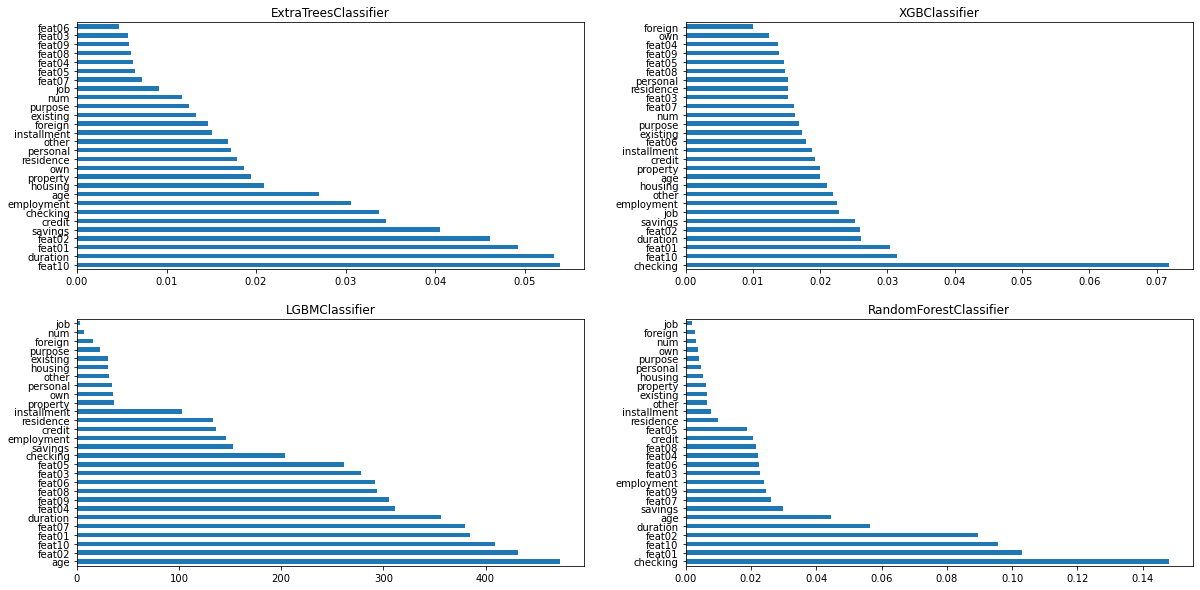

In [148]:
plt.subplots(2, 2, figsize=(20, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    pd.Series(results.results[i].best_model['model'].feature_importances_, index=X_train_numeric.columns).groupby(lambda x: x.split('_')[0]).mean().sort_values(ascending=False).plot(kind='barh')
    plt.title(results.results[i].get_model_name())

In all of the models, the most important features were:
- feat10
- duration
- checking_status
- feat01

### Model Stacking

In [2]:
import h2o
h2o.init()
df['class'] = df['class'].map({'good': 0, 'bad': 1})
dfh = h2o.H2OFrame(df.drop(columns=['purpose', 'personal_status', 'own_telephone', 'other_parties']))
train, test = dfh.split_frame([0.8])
train['class'] = train['class'].asfactor()
test['class'] = test['class'].asfactor()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /home/ubuntu/.local/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxfdx2v4c
  JVM stdout: /tmp/tmpxfdx2v4c/h2o_ubuntu_started_from_python.out
  JVM stderr: /tmp/tmpxfdx2v4c/h2o_ubuntu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 4 days
H2O_cluster_name:,H2O_from_python_ubuntu_uume5t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.97 Gb
H2O_cluster_total_cores:,30
H2O_cluster_allowed_cores:,30
H2O_cluster_status:,"locked, healthy"


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
aml_atp = h2o.automl.H2OAutoML(max_runtime_secs=600, stopping_metric='aucpr', nfolds=5, sort_metric='aucpr')
aml_atp.train(x=[col for col in train.columns if col != 'class'], y='class', training_frame=train)
lb = aml_atp.leaderboard

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [4]:
from sklearn.metrics import average_precision_score
def oos_predict_with_h2o(model_id, test_frame):
    return average_precision_score(test_frame.as_data_frame()['class'],h2o.get_model(model_id).predict(test_frame).as_data_frame()['p1'])

In [5]:
leaderboard = lb.as_data_frame()
leaderboard['oos_aucpr'] = leaderboard['model_id'].apply(lambda x: oos_predict_with_h2o(x, test))
leaderboard.sort_values(by='oos_aucpr', ascending=False)

stackedensemble prediction progress: |

/home/ubuntu/.local/lib/python3.10/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done

,model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse,oos_aucpr
0,StackedEnsemble_AllModels_3_AutoML_1_20240124_...,0.844051,0.918391,0.328973,0.152699,0.318435,0.101401,0.878440
1,StackedEnsemble_AllModels_6_AutoML_1_20240124_...,0.842275,0.917462,0.331707,0.154354,0.320562,0.102760,0.876521
6,StackedEnsemble_AllModels_5_AutoML_1_20240124_...,0.808053,0.903754,0.361078,0.177801,0.331241,0.109721,0.867040
3,StackedEnsemble_BestOfFamily_6_AutoML_1_202401...,0.830199,0.910744,0.343080,0.157489,0.325949,0.106243,0.866203
2,StackedEnsemble_BestOfFamily_4_AutoML_1_202401...,0.831014,0.910608,0.343370,0.161685,0.326054,0.106312,0.861012
...,...,...,...,...,...,...,...,...
114,DeepLearning_grid_1_AutoML_1_20240124_220002_m...,0.691446,0.835041,0.515263,0.241359,0.397525,0.158026,0.679373
115,XGBoost_grid_1_AutoML_1_20240124_220002_model_22,0.691020,0.835676,0.462051,0.249242,0.387372,0.150057,0.677065
71,DeepLearning_grid_1_AutoML_1_20240124_220002_m...,0.739122,0.860452,0.525839,0.222630,0.375850,0.141263,0.666643
126,DeepLearning_grid_1_AutoML_1_20240124_220002_m...,0.631214,0.801136,2.531045,0.246847,0.448385,0.201049,0.665899


In [43]:
h2o.get_model(leaderboard.iloc[0,0])

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In this section, we have tried out ensemble methods for prediction. We utilized H2O AutoML for the ensemble models building.
The best model, a stacked ensemble of multiple types of models, utilizes a cross-validation stacking strategy with models including 5 GBMs, 2 XGBoost, and 5 DeepLearning models. The metalearner was implemented with GLM. We can notice the model was overfit on the training data, though the Cross-Validation performance of the stacked ensemble model is still good, greater than single boosting model we have created, achieving PR AUC of 0.842 with a standard deviation of 0.024. This indicates that the model consistently performs well across different folds, showcasing stability and reliability/somewhat generalization. When it comes to OOS test, model achieved even higher AUCPR of 0.878 - about 0.08 pp above the LGBM we have mentioned earlier. In this particular task, we have managed to increase our predictions quality with stacking the models - although, we have sacrificed model explanability this way. This is a double-edged sword that should be used with caution. For this particular case, that involves credit risk, due to financial regulations, explainable models are currently the only ones available to the markets as far as I am concerned. This is in line with responsible AI usage - credit risk should be measured in a way that does not involve discrimination.

### Summary
In this comprehensive project on the German Credit Risk dataset, we conducted a thorough analysis encompassing Exploratory Data Analysis (EDA), variable transformations, selection, model training, and evaluation. Employing a diverse set of models, including RandomForest, XGBoost (XGB), ExtraTrees, and LightGBM (LGBM), we fine-tuned hyperparameters through RandomizedSearchCV. To mitigate overfitting, we implemented StratifiedKFold cross-validation. Our metric of choice was average precision score, due to it's ability to perform well in imbalanced problems.

#### Model Performance
In assessing out-of-sample data, the boosting methods—XGB and LGBM—demonstrated superior performance compared to RandomForest and ExtraTrees. This observation underscores the effectiveness of gradient boosting algorithms in capturing complex patterns within the dataset.

#### Advanced Approach: AutoML with H2O Stacked Ensemble
Venturing into advanced methodologies, we explored the application of AutoML through H2O for constructing stacked ensembles. Notably, these models surpassed the performance of our previous methods. However, it is crucial to note that this improvement comes at the expense of model explainability. Users should exercise caution and consider the trade-off between enhanced performance and interpretability when opting for stacked ensemble models generated through AutoML in H2O.

#### Key Takeaway
This project provides insights into credit risk modeling and sheds light on the trade-offs when using advanced techniques like stacked ensembles. It emphasizes the importance of balancing performance gains with interpretability in real-world applications.

#### Further Steps
When applying those kinds of model in real world, we would like to suggest using XAI libraries, such as DALEX, for interpreting model's results. This can be crucial in business understanding of the decisions made and is a great addition for model's performance evaluation.